In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
prem_data = pd.read_csv("Premier League 21-22 data.csv")
prem_data

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,22/05/2022,Crystal Palace,Man United,1,0,H,1,0,H,M Atkinson,...,3,4,12,22,3,6,2,4,0,0
376,22/05/2022,Leicester,Southampton,4,1,H,0,0,D,J Moss,...,6,2,10,5,3,3,0,1,0,0
377,22/05/2022,Liverpool,Wolves,3,1,H,1,1,D,A Taylor,...,8,5,6,3,5,3,1,0,0,0
378,22/05/2022,Man City,Aston Villa,3,2,H,0,1,A,M Oliver,...,5,2,5,11,13,1,0,1,0,0


In [3]:
prem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      380 non-null    object
 1   HomeTeam  380 non-null    object
 2   AwayTeam  380 non-null    object
 3   FTHG      380 non-null    int64 
 4   FTAG      380 non-null    int64 
 5   FTR       380 non-null    object
 6   HTHG      380 non-null    int64 
 7   HTAG      380 non-null    int64 
 8   HTR       380 non-null    object
 9   Referee   380 non-null    object
 10  HS        380 non-null    int64 
 11  AS        380 non-null    int64 
 12  HST       380 non-null    int64 
 13  AST       380 non-null    int64 
 14  HF        380 non-null    int64 
 15  AF        380 non-null    int64 
 16  HC        380 non-null    int64 
 17  AC        380 non-null    int64 
 18  HY        380 non-null    int64 
 19  AY        380 non-null    int64 
 20  HR        380 non-null    int64 
 21  AR        380 no

In [4]:
prem_data.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [5]:
prem_data.columns = ['date', 'home_team', 'away_team', 'full_time_home_goals', 
 'full_time_away_goals', 'full_time_result', 'half_time_home_goals', 
 'half_time_away_goals','half_time_results', 'referee',
 'home_shot', 'away_shot', 'home_shot_target', 'away_shot_target',
 'home_fouls', 'away_fouls', 'home_corner', 'away_corner', 
 'home_yellow', 'away_yellow', 'home_red', 'away_red']

In [6]:
prem_data.head()

,date,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_results,referee,...,home_shot_target,away_shot_target,home_fouls,away_fouls,home_corner,away_corner,home_yellow,away_yellow,home_red,away_red
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


In [7]:
prem_data.columns = prem_data.columns.str.replace("home", "h").str.replace("away", "a")
prem_data.head()

,date,h_team,a_team,full_time_h_goals,full_time_a_goals,full_time_result,half_time_h_goals,half_time_a_goals,half_time_results,referee,...,h_shot_target,a_shot_target,h_fouls,a_fouls,h_corner,a_corner,h_yellow,a_yellow,h_red,a_red
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


In [8]:
# setting the date to pandas date-time format
prem_data["date"] = pd.to_datetime(prem_data["date"], infer_datetime_format= True)
prem_data.head()

,date,h_team,a_team,full_time_h_goals,full_time_a_goals,full_time_result,half_time_h_goals,half_time_a_goals,half_time_results,referee,...,h_shot_target,a_shot_target,h_fouls,a_fouls,h_corner,a_corner,h_yellow,a_yellow,h_red,a_red
0,2021-08-13,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,2021-08-14,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,2021-08-14,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,2021-08-14,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,2021-08-14,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


In [9]:
# checking for null values
prem_data.isnull().sum()

date                 0
h_team               0
a_team               0
full_time_h_goals    0
full_time_a_goals    0
full_time_result     0
half_time_h_goals    0
half_time_a_goals    0
half_time_results    0
referee              0
h_shot               0
a_shot               0
h_shot_target        0
a_shot_target        0
h_fouls              0
a_fouls              0
h_corner             0
a_corner             0
h_yellow             0
a_yellow             0
h_red                0
a_red                0
dtype: int64

In [10]:
# seeing the home teams occuring only once
prem_data["h_team"].unique()

array(['Brentford', 'Man United', 'Burnley', 'Chelsea', 'Everton',
       'Leicester', 'Watford', 'Norwich', 'Newcastle', 'Tottenham',
       'Liverpool', 'Aston Villa', 'Crystal Palace', 'Leeds', 'Man City',
       'Brighton', 'Southampton', 'Wolves', 'Arsenal', 'West Ham'],
      dtype=object)

In [11]:
# seeing how many times each team occurs in the home team column
prem_data["h_team"].value_counts()

Brentford         19
Man United        19
Arsenal           19
Wolves            19
Southampton       19
Brighton          19
Man City          19
Leeds             19
Crystal Palace    19
Aston Villa       19
Liverpool         19
Tottenham         19
Newcastle         19
Norwich           19
Watford           19
Leicester         19
Everton           19
Chelsea           19
Burnley           19
West Ham          19
Name: h_team, dtype: int64

In [12]:
# seeing how many times each team occurs in the home team column
prem_data["a_team"].value_counts()

Arsenal           19
Leeds             19
Chelsea           19
Tottenham         19
Man United        19
Watford           19
Norwich           19
Everton           19
Brentford         19
Newcastle         19
Burnley           19
Man City          19
West Ham          19
Liverpool         19
Aston Villa       19
Wolves            19
Southampton       19
Crystal Palace    19
Brighton          19
Leicester         19
Name: a_team, dtype: int64

### Creating a Premier Leauge Table from the data

In [13]:
# obtaining the unique teams
prem_table = pd.DataFrame(prem_data["h_team"].unique(), columns = ["teams"])
prem_table

,teams
0,Brentford
1,Man United
2,Burnley
3,Chelsea
4,Everton
5,Leicester
6,Watford
7,Norwich
8,Newcastle
9,Tottenham


In [14]:
# adding more columns
prem_table[['Played','Win','Draw','Loss','GF','GA','GD','Points']] = 0
prem_table

,teams,Played,Win,Draw,Loss,GF,GA,GD,Points
0,Brentford,0,0,0,0,0,0,0,0
1,Man United,0,0,0,0,0,0,0,0
2,Burnley,0,0,0,0,0,0,0,0
3,Chelsea,0,0,0,0,0,0,0,0
4,Everton,0,0,0,0,0,0,0,0
5,Leicester,0,0,0,0,0,0,0,0
6,Watford,0,0,0,0,0,0,0,0
7,Norwich,0,0,0,0,0,0,0,0
8,Newcastle,0,0,0,0,0,0,0,0
9,Tottenham,0,0,0,0,0,0,0,0


In [15]:
# setting the teams column as the index column
prem_table = prem_table.set_index("teams")
prem_table

,Played,Win,Draw,Loss,GF,GA,GD,Points
teams,,,,,,,,
Brentford,0,0,0,0,0,0,0,0
Man United,0,0,0,0,0,0,0,0
Burnley,0,0,0,0,0,0,0,0
Chelsea,0,0,0,0,0,0,0,0
Everton,0,0,0,0,0,0,0,0
Leicester,0,0,0,0,0,0,0,0
Watford,0,0,0,0,0,0,0,0
Norwich,0,0,0,0,0,0,0,0
Newcastle,0,0,0,0,0,0,0,0


In [16]:
# filling the table by looping through the index
for i in prem_data.index: # i here represents the index from the imported dataframe
    home = prem_data.loc[i,"h_team"]
    away = prem_data.loc[i, "a_team"]
    prem_table.loc[home, "Played"] += 1
    prem_table.loc[away, "Played"] += 1
#     using if statements to update rsults based on  home wins
    if prem_data.loc[i,"full_time_result"] == "H":
        prem_table.loc[home, "Win"] += 1
        prem_table.loc[home, "Points"] += 3
        prem_table.loc[away, "Loss"] += 1
#     using if statements to update results based on away wins
    elif prem_data.loc[i, "full_time_result"] == "A":
        prem_table.loc[away, "Win"] += 1
        prem_table.loc[home, "Loss"] += 1
        prem_table.loc[away, "Points"] += 3 
#     using if statement to update the results based on draws
    elif prem_data.loc[i,"full_time_result"] == "D":
        prem_table.loc[home, "Draw"] += 1
        prem_table.loc[away, "Draw"] += 1
        prem_table.loc[home, "Points"] += 1
        prem_table.loc[away, "Points"] += 1  
#     updating results based on goals
    home_goals = prem_data.loc[i, "full_time_h_goals"]
    away_goals = prem_data.loc[i, "full_time_a_goals"]
    prem_table.loc[home, "GF"] += home_goals
    prem_table.loc[away,"GF"] += away_goals
    prem_table.loc[home, "GA"] += away_goals
    prem_table.loc[away, "GA"] += home_goals
#     updating the goal difference 
prem_table["GD"] = prem_table["GF"] - prem_table["GA"]
# sorting according to goal difference first then points
prem_table = prem_table.sort_values("GD", ascending = False).sort_values("Points", ascending = False)
prem_table.reset_index(inplace = True)
prem_table

,teams,Played,Win,Draw,Loss,GF,GA,GD,Points
0,Man City,38,29,6,3,99,26,73,93
1,Liverpool,38,28,8,2,94,26,68,92
2,Chelsea,38,21,11,6,76,33,43,74
3,Tottenham,38,22,5,11,69,40,29,71
4,Arsenal,38,22,3,13,61,48,13,69
5,Man United,38,16,10,12,57,57,0,58
6,West Ham,38,16,8,14,60,51,9,56
7,Leicester,38,14,10,14,62,59,3,52
8,Wolves,38,15,6,17,38,43,-5,51
9,Brighton,38,12,15,11,42,44,-2,51


### Which team commited the most fouls

In [17]:
prem_data.head()

,date,h_team,a_team,full_time_h_goals,full_time_a_goals,full_time_result,half_time_h_goals,half_time_a_goals,half_time_results,referee,...,h_shot_target,a_shot_target,h_fouls,a_fouls,h_corner,a_corner,h_yellow,a_yellow,h_red,a_red
0,2021-08-13,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,2021-08-14,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,2021-08-14,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,2021-08-14,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,2021-08-14,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


In [18]:
prem_data.columns

Index(['date', 'h_team', 'a_team', 'full_time_h_goals', 'full_time_a_goals',
       'full_time_result', 'half_time_h_goals', 'half_time_a_goals',
       'half_time_results', 'referee', 'h_shot', 'a_shot', 'h_shot_target',
       'a_shot_target', 'h_fouls', 'a_fouls', 'h_corner', 'a_corner',
       'h_yellow', 'a_yellow', 'h_red', 'a_red'],
      dtype='object')

In [19]:
f = prem_data[["h_team", "a_team", "h_fouls", "a_fouls"]]
f

,h_team,a_team,h_fouls,a_fouls
0,Brentford,Arsenal,12,8
1,Man United,Leeds,11,9
2,Burnley,Brighton,10,7
3,Chelsea,Crystal Palace,15,11
4,Everton,Southampton,13,15
...,...,...,...,...
375,Crystal Palace,Man United,12,22
376,Leicester,Southampton,10,5
377,Liverpool,Wolves,6,3
378,Man City,Aston Villa,5,11


In [20]:
table = pd.DataFrame(f["h_team"].unique(), columns = ["Teams"])
table

,Teams
0,Brentford
1,Man United
2,Burnley
3,Chelsea
4,Everton
5,Leicester
6,Watford
7,Norwich
8,Newcastle
9,Tottenham


In [21]:
table["fouls"] = 0
table.set_index("Teams", inplace=True)
table

,fouls
Teams,
Brentford,0
Man United,0
Burnley,0
Chelsea,0
Everton,0
Leicester,0
Watford,0
Norwich,0
Newcastle,0


In [22]:
f.head()

,h_team,a_team,h_fouls,a_fouls
0,Brentford,Arsenal,12,8
1,Man United,Leeds,11,9
2,Burnley,Brighton,10,7
3,Chelsea,Crystal Palace,15,11
4,Everton,Southampton,13,15


In [23]:
# looping through the data and updating the fouls
for i in f.index:
    home = f.loc[i, "h_team"]
    away = f.loc[i, "a_team"]
    home_fouls = f.loc[i, "h_fouls"]
    away_fouls = f.loc[i, "a_fouls"]
    table.loc[home, "fouls"] += home_fouls
    table.loc[away, "fouls"] += away_fouls
table = table.sort_values("fouls", ascending=False) # sorting from team with most fouls to least
table.reset_index(inplace=True)
table

,Teams,fouls
0,Leeds,469
1,Watford,440
2,Crystal Palace,415
3,Chelsea,409
4,Southampton,402
5,Aston Villa,401
6,Man United,395
7,Burnley,394
8,Brighton,393
9,Newcastle,391


Plotting a bar plot 

<AxesSubplot:xlabel='Teams', ylabel='fouls'>

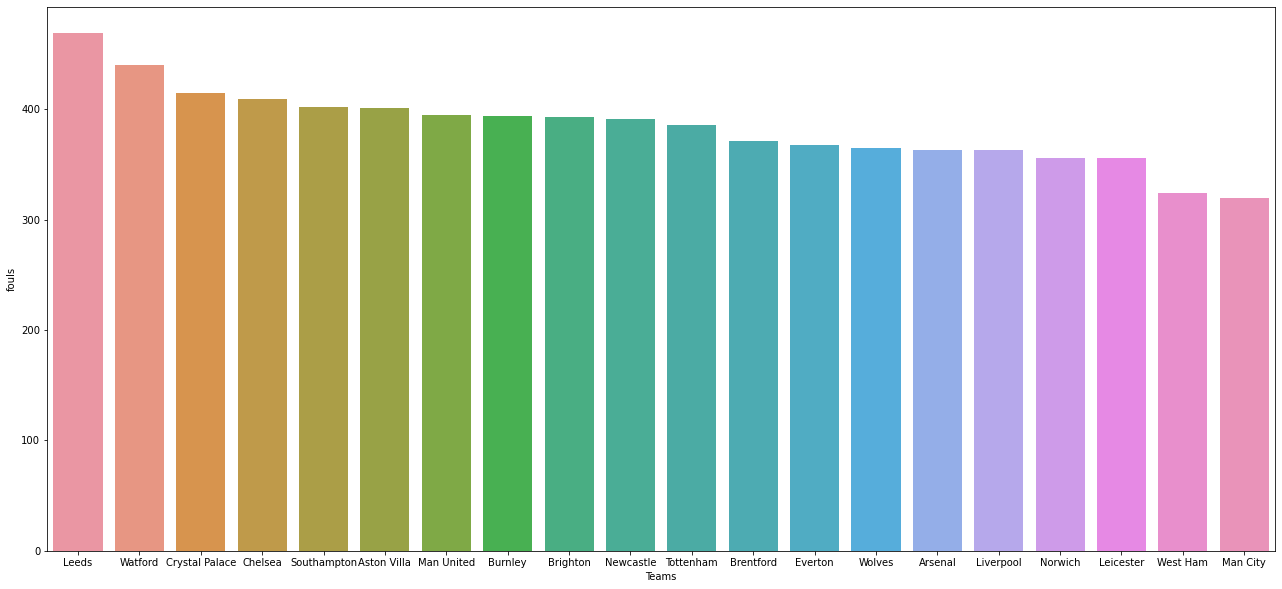

In [24]:
plt.figure(figsize = (22,10))
sns.barplot(x = "Teams",y = "fouls", data = table)

Making it a horizontal barplot

<AxesSubplot:xlabel='fouls', ylabel='Teams'>

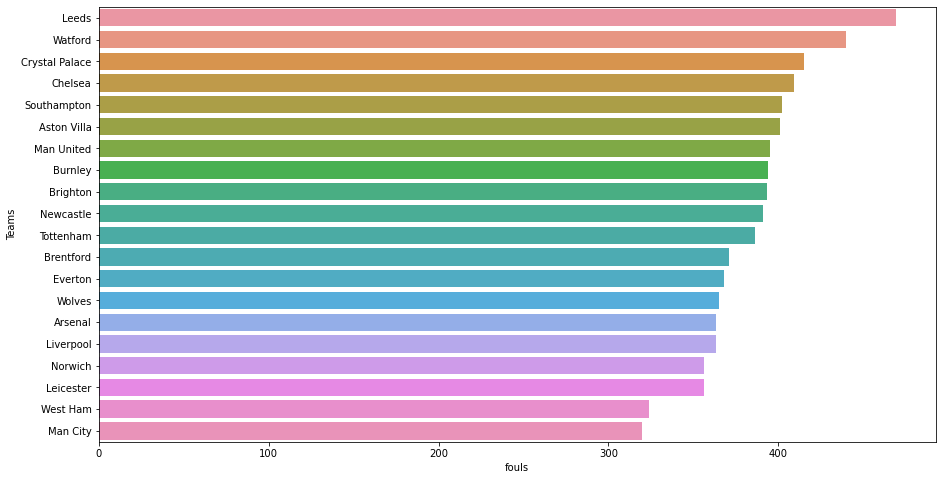

In [25]:
plt.figure(figsize = (15,8))
sns.barplot(y = "Teams",x = "fouls", data = table)